In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time

import Featurizer as ft

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
pd.set_option('display.max_columns', 50)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]

In [4]:
import category_encoders as ce

OHE = ce.OneHotEncoder( handle_unknown='ignore', use_cat_names=True)

BE = ce.BinaryEncoder( handle_unknown='ignore')
SumE = ce.SumEncoder( handle_unknown='ignore')

TE1 = ce.TargetEncoder( handle_unknown='ignore')
TE2 = ce.TargetEncoder( handle_unknown='ignore')
TE3 = ce.TargetEncoder( handle_unknown='ignore')
TE4 = ce.TargetEncoder( handle_unknown='ignore')
TE5 = ce.TargetEncoder( handle_unknown='ignore')
TE6 = ce.TargetEncoder( handle_unknown='ignore')

In [5]:
df_train = pd.read_csv("../data/palabras.csv")

#mx = pd.read_csv("../data/mx_modified.csv")

#mx = mx[["population_proper","provincia"]]

#df_train = pd.merge(df_train,mx,on="provincia",how="left")

#df_feature_descripcion = pd.read_csv("../data/word-features-reduced.csv", dtype=np.float16)

#df_train = df_train.join(df_feature_descripcion)

## Pre-processing

In [6]:
X = df_train.drop("precio", axis=1)
y = df_train['precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
X_train_submit = X_train.copy()

In [8]:
X_train["ambientes"] = X_train["banos"] + X_train["habitaciones"]
X_train["ambientesygarage"] = X_train["banos"] + X_train["habitaciones"]+X_train["garages"]

X_test["ambientes"] = X_test["banos"] + X_test["habitaciones"]
X_test["ambientesygarage"] = X_test["banos"] + X_test["habitaciones"]+X_test["garages"]

In [9]:
X_train[ ft.getTarget1Cols() ] = X_train[ft.getAllCols()+["antiguedad","banos","habitaciones"]]
X_test[ ft.getTarget1Cols() ] = X_test[ft.getAllCols()+["antiguedad","banos","habitaciones"]]

X_train[ ft.getTarget2Cols() ] = X_train[["tipodepropiedad","idzona"]]
X_test[ ft.getTarget2Cols() ] = X_test[["tipodepropiedad","idzona"]]

X_train[ ft.getTarget3Cols() ] = X_train[ft.getAllCols()]
X_test[ ft.getTarget3Cols() ] = X_test[ft.getAllCols()]

X_train[ ft.getTarget4Cols() ] = X_train[ft.getAllCols()]
X_test[ ft.getTarget4Cols() ] = X_test[ft.getAllCols()]

X_train[ ft.getTarget5Cols() ] = X_train[ft.getAllCols()]
X_test[ ft.getTarget5Cols() ] = X_test[ft.getAllCols()]

X_train[ ft.getTarget6Cols() ] = X_train[ft.getAllCols()]
X_test[ ft.getTarget6Cols() ] = X_test[ft.getAllCols()]

In [10]:
X_train = ft.preprocess(X_train, OHE, BE, 'train', TE1, TE2, TE3, TE4, SumE, TE5, TE6, y_train)
X_test = ft.preprocess( X_test , OHE, BE, 'test' , TE1, TE2, TE3, TE4, SumE, TE5, TE6)

--- 70.98762631416321 seconds ---
--- 8.93204951286316 seconds ---


In [11]:
print(f"Original shapes: X={X.shape} y={y.shape}")
print(f"Train shapes: X={X_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={X_test.shape}  y=-{y_test.shape}")

Original shapes: X=(240000, 84) y=(240000,)
Train shapes: X=(180000, 218) y=(180000,)
Test  shapes: X=(60000, 218)  y=-(60000,)


In [12]:
X_train

,intercept,id,tipodepropiedad_Casa en condominio,tipodepropiedad_Casa,tipodepropiedad_Apartamento,tipodepropiedad_Terreno,tipodepropiedad_Local Comercial,tipodepropiedad_Quinta Vacacional,tipodepropiedad_Bodega comercial,tipodepropiedad_Otros,tipodepropiedad_Oficina comercial,tipodepropiedad_Terreno comercial,tipodepropiedad_Local en centro comercial,tipodepropiedad_Edificio,tipodepropiedad_Duplex,tipodepropiedad_Terreno industrial,tipodepropiedad_Villa,tipodepropiedad_Nave industrial,tipodepropiedad_Casa uso de suelo,tipodepropiedad_Inmuebles productivos urbanos,tipodepropiedad_Departamento Compartido,tipodepropiedad_Rancho,tipodepropiedad_Huerta,tipodepropiedad_nan,tipodepropiedad_Lote,...,ciudad_target_banos,idzona_target_banos,tipodepropiedad_target_banos,provincia_target_banos,ciudad_target_habit,idzona_target_habit,tipodepropiedad_target_habit,provincia_target_habit,ciudad_target_banoshabit,idzona_target_banoshabit,tipodepropiedad_target_banoshabit,provincia_target_banoshabit,metroscubiertostotales,m_cuadrado,m_tot_log,m_cub_log,m2_log,m_cuad_log,m_tot_sqrt,m_cub_sqrt,m2_sqrt,banosPorHabit,mtotPorHabit,mtotPorBanos,mtotPorAmbiente
122812,1,298880,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.375197,2.286065,2.366924,2.326781,2.877769,2.914834,2.957374,2.841563,0.855810,0.807407,0.807171,0.856227,330.0,27200.0,5.075174,5.135798,5.799093,10.210972,12.649111,13.038405,18.165902,0.666667,53.333333,80.0,32.000000
180398,1,87355,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.090909,2.133796,2.242734,1.884764,3.069767,2.903655,3.093696,2.897596,0.727649,0.758639,0.743306,0.663843,296.0,21840.0,5.049856,4.941642,5.690359,9.991498,12.489996,11.832160,17.204651,1.000000,78.000000,78.0,39.000000
157317,1,141560,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.919353,1.763636,1.817604,1.985042,2.536850,2.378571,2.388201,2.741933,0.794755,0.789767,0.777893,0.760274,186.0,8649.0,4.532599,4.532599,5.225747,9.065199,9.643651,9.643651,13.638182,0.666667,31.000000,46.5,18.600000
78425,1,63104,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.609076,1.217391,2.242734,2.083613,2.818333,2.727273,3.093696,2.972207,0.582041,0.469697,0.743306,0.717504,198.0,9605.0,4.442651,4.727388,5.288267,9.170039,9.219544,10.630146,14.071247,0.333333,28.333333,85.0,21.250000
73755,1,260795,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.081290,2.318182,2.242734,1.985042,3.037325,3.042254,3.093696,2.741933,0.708725,0.771717,0.743306,0.760274,550.0,60000.0,5.991465,5.010635,6.309918,11.002100,20.000000,12.247449,23.452079,0.500000,100.000000,200.0,66.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,271551,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.375197,3.148148,2.242734,2.326781,2.877769,3.090909,3.093696,2.841563,0.855810,1.086420,0.743306,0.856227,407.0,40950.0,5.416100,5.204007,6.008813,10.620107,15.000000,13.490738,20.174241,1.000000,75.000000,75.0,37.500000
103694,1,151225,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.356115,1.000000,2.242734,2.083613,2.444444,2.052632,3.093696,2.972207,0.569349,0.491228,0.743306,0.717504,118.0,3481.0,4.077537,4.077537,4.770685,8.155075,7.681146,7.681146,10.862780,0.500000,29.500000,59.0,19.666667
131932,1,245245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.005226,2.062500,2.242734,2.229520,2.840351,2.562500,3.093696,3.039390,0.735663,0.830645,0.743306,0.752466,210.0,11025.0,4.653960,4.653960,5.347108,9.307921,10.246951,10.246951,14.491377,0.666667,35.000000,52.5,21.000000
146867,1,154866,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.356115,1.192053,2.242734,2.083613,2.444444,2.340000,3.093696,2.972207,0.569349,0.531444,0.743306,0.717504,160.0,6400.0,4.382027,4.382027,5.075174,8.764053,8.944272,8.944272,12.649111,0.500000,20.000000,40.0,13.333333


## Training

In [13]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=2000,n_jobs=6,objective="reg:squarederror",
                     max_depth= 11,min_child_weight = 1,colsample_bytree=0.5,
                     gamma=1, learning_rate=0.05, subsample=1)
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=1,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=11, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=6, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [14]:
start_time = time.time()
model.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 3274.095988035202 seconds ---


## Predicciones

In [15]:
ft.predecir(model, X_train, y_train, X_test, y_test)

Entrenamiento: 99.5804%
Testeo: 84.9453%.
Mean abs error: 468893.3161.


In [16]:
plt.rcParams["figure.figsize"] = [15, 15]

importancia = model.feature_importances_

d = {'x':X_train.columns,'y':importancia}

df_importancia = pd.DataFrame(d)

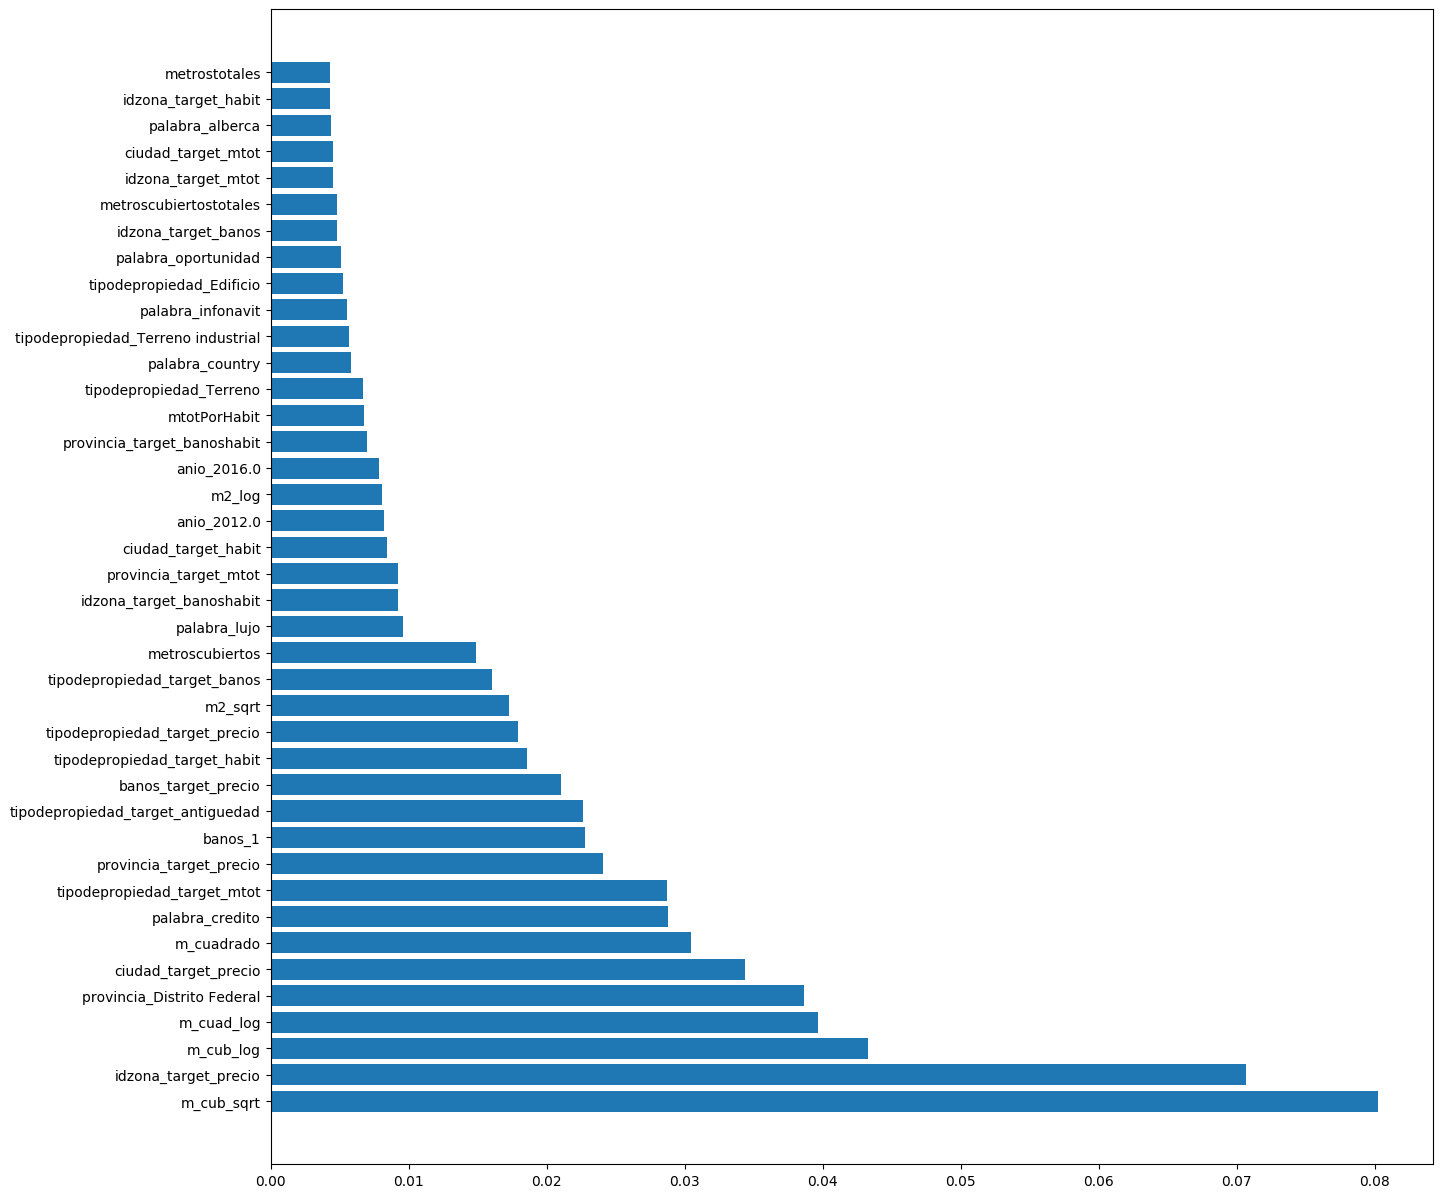

In [17]:
importancia = df_importancia.sort_values(by="y",ascending=False).head(40)
ax = plt.barh(importancia.x,importancia.y)


## Submission

In [18]:
df_test = pd.read_csv('../data/test.csv')


In [19]:
df = df_test.copy()
df = ft.init_test(df)
#df = pd.merge(df,mx,on="provincia",how="left")

In [20]:
df["ambientes"] = df["banos"] + df["habitaciones"]
df["ambientesygarage"] = df["banos"] + df["habitaciones"]+df["garages"]

In [21]:
df[ ft.getTarget1Cols() ] = df[ft.getAllCols()+["antiguedad","banos","habitaciones"]]
df[ ft.getTarget2Cols() ] = df[["tipodepropiedad","idzona"]]
df[ ft.getTarget3Cols() ] = df[ft.getAllCols()]
df[ ft.getTarget4Cols() ] = df[ft.getAllCols()]
df[ ft.getTarget5Cols() ] = df[ft.getAllCols()]
df[ ft.getTarget6Cols() ] = df[ft.getAllCols()]

In [22]:
df = ft.preprocess(df,  OHE, BE, 'test' , TE1, TE2, TE3, TE4, SumE, TE5, TE6)

--- 4.017804861068726 seconds ---


In [23]:
#df, X_train = df.align(X_train,axis=1)


In [24]:
submit_prediction = model.predict( df )

In [25]:
#cols_diff = []
#t = X_train_submit.columns.values
#fs = df.columns.values
#i = 0
#for feat in t:
#    if feat != fs[i]:
#        cols_diff.append(feat)
#    i=+1
#display(cols_diff)        

In [26]:
#pd.concat([df_test[['id']], pd.Series(submit_prediction)], axis=1).rename(columns={0:"target"}).to_csv("../data/submission13.csv", index=False)

In [27]:
from submission_helper import submission_output

output = submission_output(df_test, submit_prediction)

nombre_submit = 'submission37.csv'

output.to_csv('../data/results/A subir/'+nombre_submit, index=False)